## Petrolib
This is a python software package designed to help geoscientists perform quick formation evaluation workflow by estimating reservoir petrophysical parameters such as:

Volume of Shale using various methods like Clavier, Stieber and Larionov methods

Porosity - Effective and Total porosities using the Density and Wyllie’s sonic methods.

Water Saturation - using both archie and simmandoux methods

Permeability

In addition to estimating these parameters, log plots are automatically displayed for proper interpretation. Also a pay summary result is generated in XLSX to help quantify the over-all quality of reservoirs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import petrolib

In [2]:
from pathlib import Path
from petrolib import procs
from petrolib import file_reader as fr
from petrolib.workflow import Quanti
from petrolib.plots import tripleCombo, Zonation, plotLog
#from petrolib.file_reader import load_las
import lasio

In [3]:
well1 = pd.read_csv("Documents/Yinka's PHD data/E-BD1.csv", header=0)

In [4]:
well1

,DEPTH,FULL_GR,LLD1,RHOZ,HNPO,DT4P,TEMP
0,120.0000,NaN,NaN,NaN,NaN,NaN,9.7320
1,120.1524,NaN,NaN,NaN,NaN,NaN,9.7375
2,120.3048,NaN,NaN,NaN,NaN,NaN,9.7431
3,120.4572,NaN,NaN,NaN,NaN,NaN,9.7486
4,120.6096,NaN,NaN,NaN,NaN,NaN,9.7542
...,...,...,...,...,...,...,...
20862,3299.3688,NaN,NaN,NaN,NaN,NaN,125.4610
20863,3299.5212,NaN,NaN,NaN,NaN,NaN,125.4666
20864,3299.6736,NaN,NaN,NaN,NaN,NaN,125.4721
20865,3299.8260,NaN,NaN,NaN,NaN,NaN,125.4777


EBD1 = lasio.read("Documents/Yinka's PHD data/E-BD1.las")

well1 = EBD1.df()

well1.head()

well1.describe()

well1.to_csv('E-BD1.csv')

## Interp
### Cross plot
Plots the cross plot relationship of density against porosity on compatible scales to facilitate in identification of reservoir type and its fluid type.

This code was initially written by Yohanes Nuwara but was modified to give the resulting plot a more classic and pretty view.

Parameters : df (pd.DataFrame) – Dataframe of well

column_x (str) – Porosity column

column_y (str) – Density column

hue (str) – Column to color code the scatter plot by

color_code (str default None) – Color code typing. If ‘num’, arg hue must be a continuous column. If ‘cat’, argument hue must be a categorical column

figsize (tuple) – Size of plot

rhob_fluid (float, default 1.0) – Fluid density

res_name (str) – Reservoir name

cmap (str) – color map

Return type : A plot showing the neutron-density cross plot

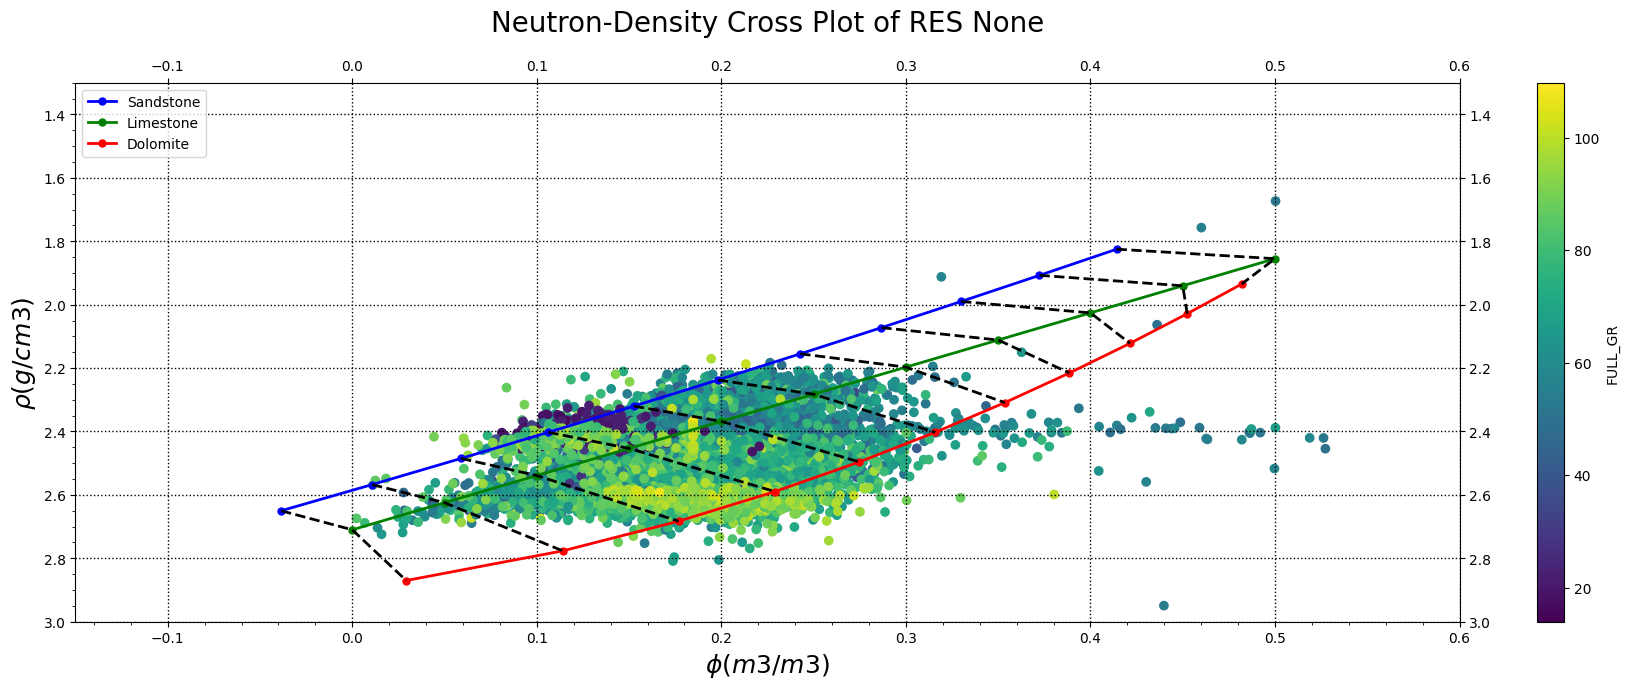

In [5]:
from petrolib.interp import crossPlot
crossPlot(well1, column_x='HNPO', column_y='RHOZ', color_code='num', hue='FULL_GR')

## Plot Pickett
Plot Pickett plot based on a pattern recognition approach to solving Archie’s equation. The resistivity and porosity logs are plotted on a logarithmic scales to evaluate formation characteristics of conventional, granular reservoirs. Read more here: https://wiki.seg.org/wiki/Pickett_plot

Parameters : df (pd.DataFrame) – Dataframe

rt (str) – Resistivity column

rwa (float default 0.03) – Formation water resisitivity

a (float default, 1.) – Turtuosity factor

m (float default 2.) – Cementation factor

n (float default 2.) – Saturation exponent

res_name (str) – Reservoir/Zone name

figsize (tuple) – Size of plot

hue (str) – Column to color code the scatter plot by.

color_code (str default None) – Color code typing. If ‘num’, arg hue must be a continuous column If ‘cat’, argument hue must be a categorical column if None, there is no color coding

cmap (str) – Color map option

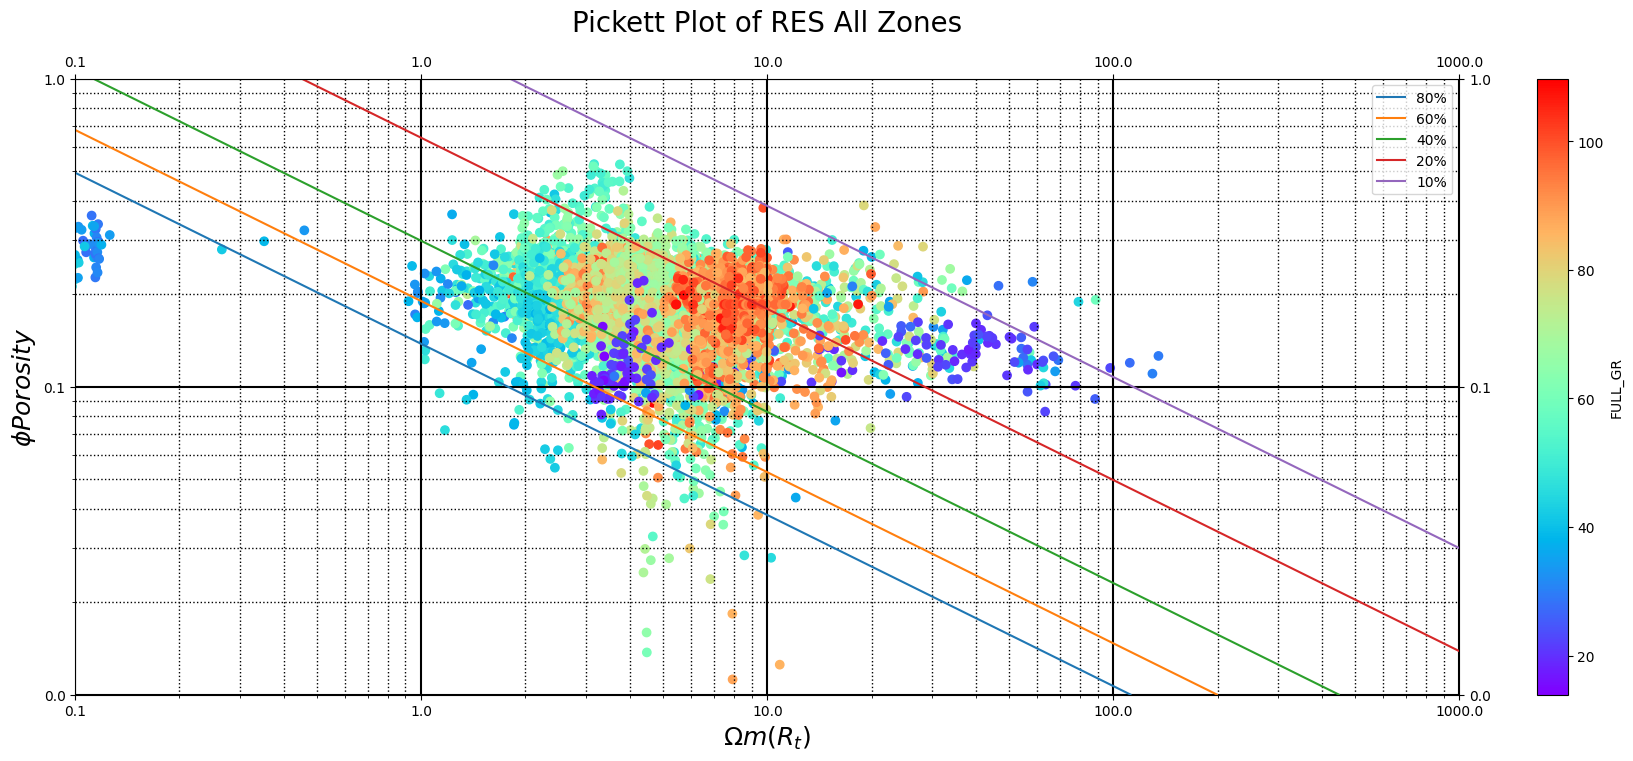

In [6]:
from petrolib.interp import picketPlot
picketPlot(well1, rt='LLD1', por='HNPO',res_name='All Zones', color_code='num', hue='FULL_GR', cmap='rainbow')

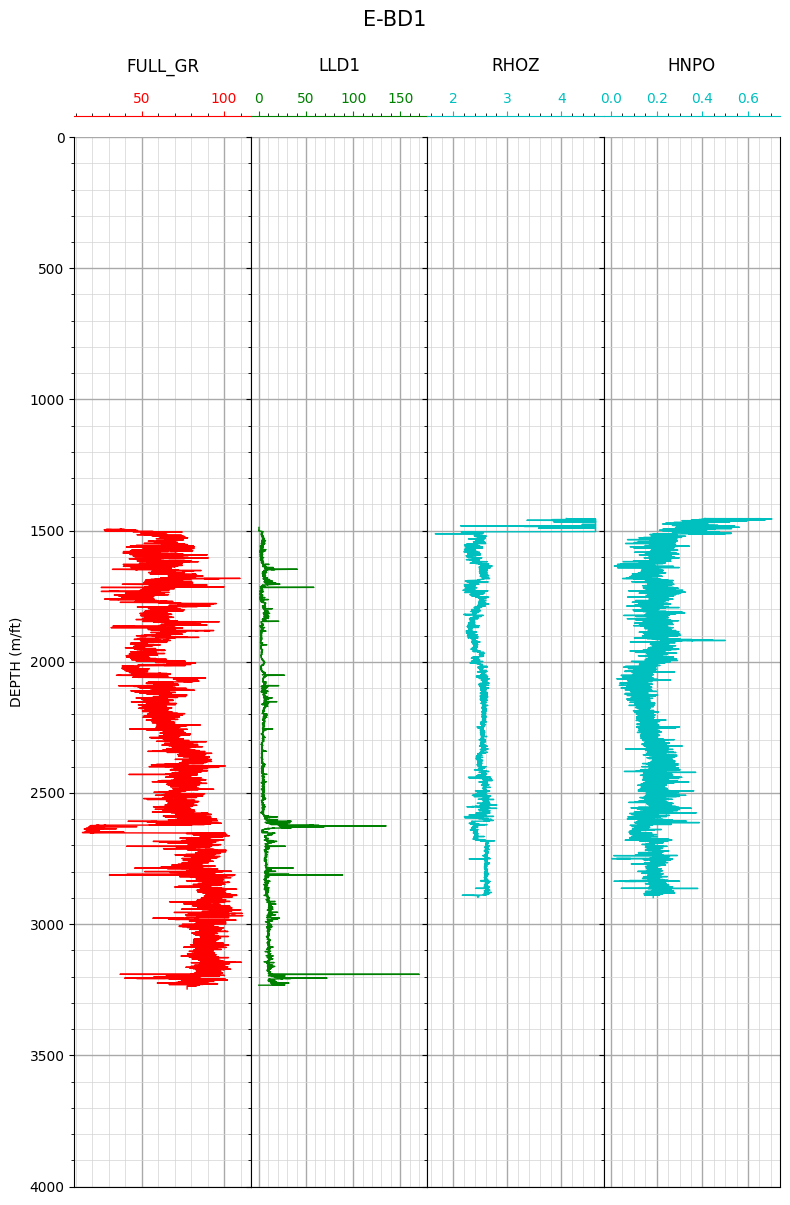

In [7]:
plotLog(well1,"DEPTH",['FULL_GR', 'LLD1', 'RHOZ', 'HNPO'], 0, 4000, 'E-BD1')


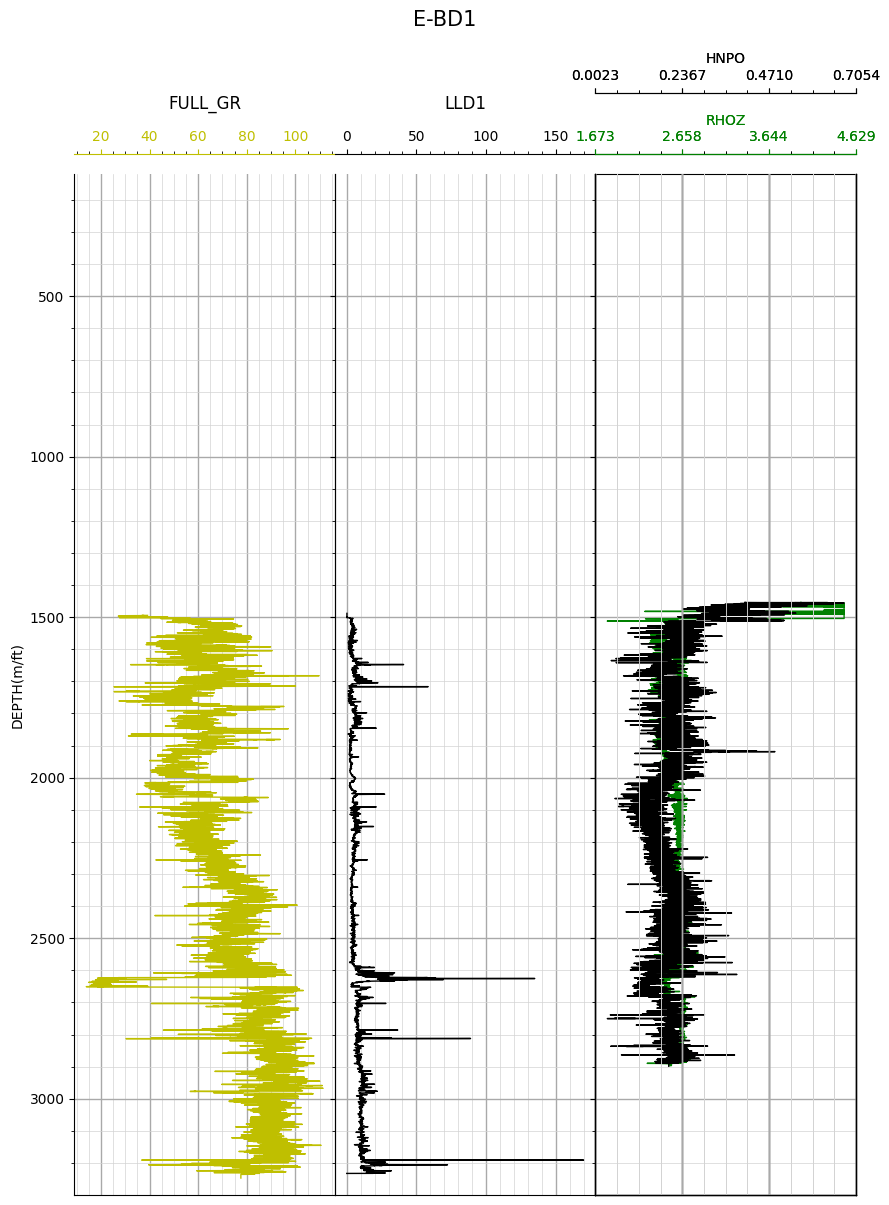

In [8]:
from petrolib.plots import plotLogs
plotLogs(well1, 'DEPTH', ['FULL_GR', 'LLD1', ['RHOZ', 'HNPO']], top=well1.DEPTH.min(),
                       bottom=well1.DEPTH.max(), figsize=(9, 12), title='E-BD1')

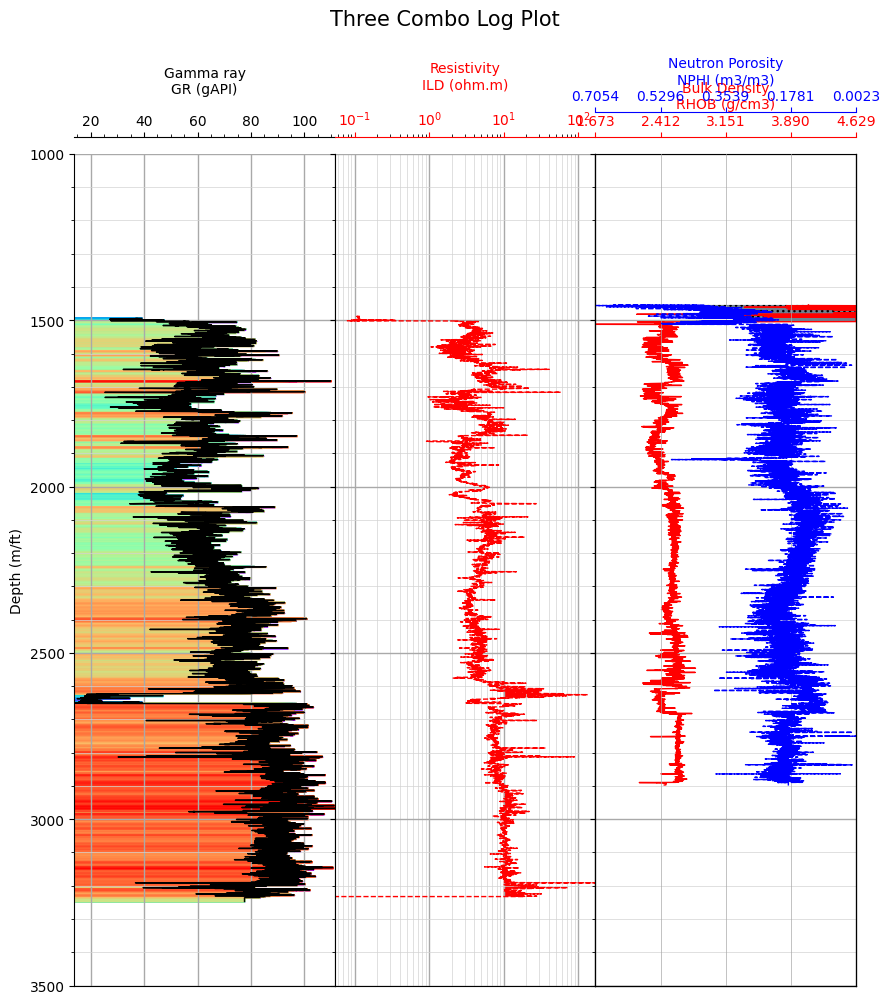

In [9]:
tripleCombo(well1, 'DEPTH', 'FULL_GR', 'LLD1', 'HNPO', 'RHOZ', ztop=1000,
                    zbot=3500, res_thres=10, fill='right', palette_op='rainbow', limit='left')

## Procs
Models lithofacies from Gamma ray log specific to a particular environment

Parameters : df (pd.DataFrame) – dataframe

gr (str) – Gamma ray log column

env (str) – Environment type. Either siliciclastic or carbonate * ‘SS’ for Siliclastic (Shale and Sandstone) environment * ‘CO’ for carbonate (Anhydrite, Limestone, Dolomite, Sandstone, Shale) environment

Example

In [10]:
from petrolib.procs import model_facies
model_facies(well1, gr='FULL_GR', env='SS')

,DEPTH,FULL_GR,LLD1,RHOZ,HNPO,DT4P,TEMP,litho
0,120.0000,NaN,NaN,NaN,NaN,NaN,9.7320,Shale
1,120.1524,NaN,NaN,NaN,NaN,NaN,9.7375,Shale
2,120.3048,NaN,NaN,NaN,NaN,NaN,9.7431,Shale
3,120.4572,NaN,NaN,NaN,NaN,NaN,9.7486,Shale
4,120.6096,NaN,NaN,NaN,NaN,NaN,9.7542,Shale
...,...,...,...,...,...,...,...,...
20862,3299.3688,NaN,NaN,NaN,NaN,NaN,125.4610,Shale
20863,3299.5212,NaN,NaN,NaN,NaN,NaN,125.4666,Shale
20864,3299.6736,NaN,NaN,NaN,NaN,NaN,125.4721,Shale
20865,3299.8260,NaN,NaN,NaN,NaN,NaN,125.4777,Shale


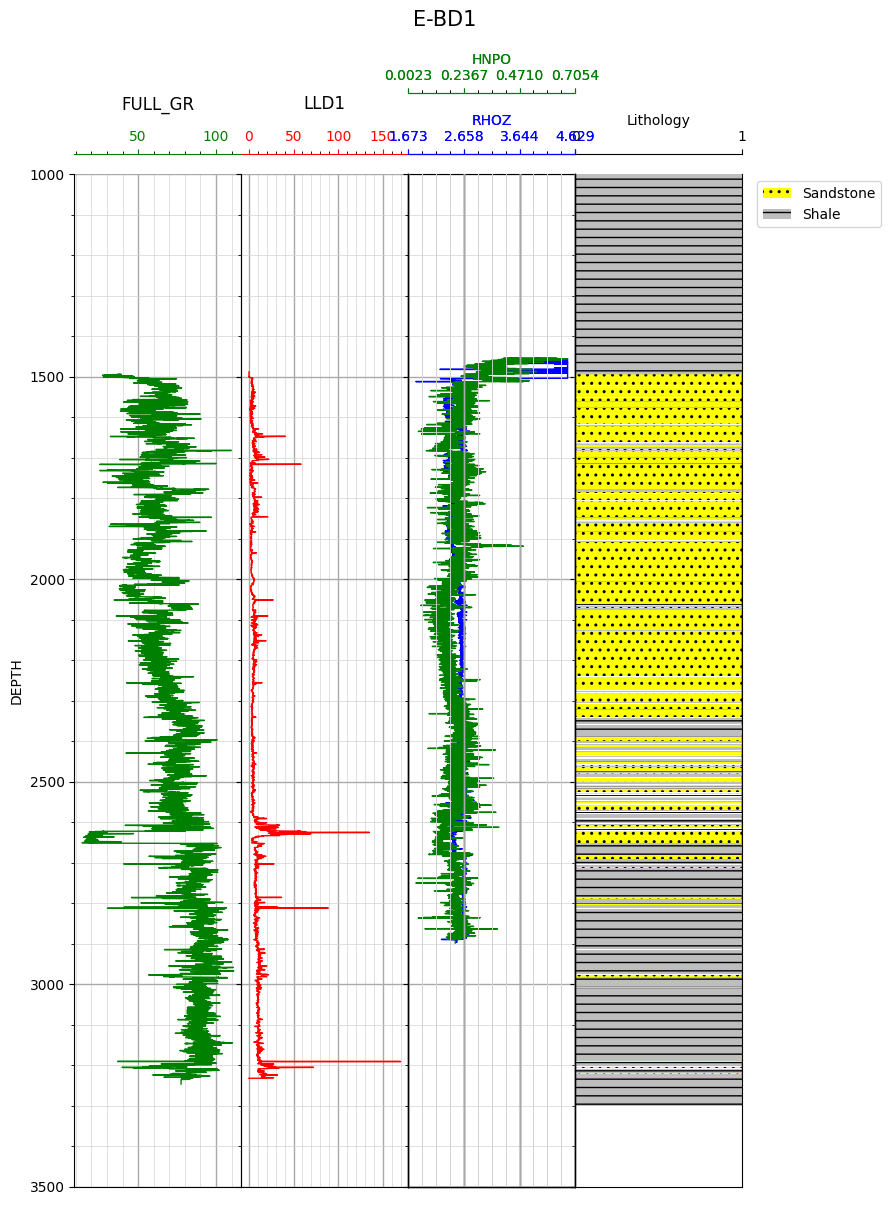

In [11]:
from petrolib.plots import plotLogFacies
plotLogFacies(well1, 'DEPTH', ['FULL_GR', 'LLD1', ['RHOZ', 'HNPO']], facies='litho', top=1000.0,
                        bottom=3500.0, figsize=(9, 12), title='E-BD1')

Function to preprocess data before beginning petrophysics workflow. This processing workflow uses conventional values for the log curves. To use user-defined preprocessing method , refer to the petrolib.data.procs.trim()

Parameters : df (pd.DataFrame) – dataframe object

gr (str) – Gamma ray column

rt (str) – Resistivity column

nphi (str) – Neutron porosity column

rhob (str) – Bulk density column

sonic (str, default None) – Sonic column (optional)

trim (str default 'both') – Conditions for trim arbitrary values * ‘max’ : to trim values higher than conventional maximum values * ‘min’ : to trim values lower than conventional lower values * default ‘both’ : to trim both lower and higher values to conventional high and lower values

Return type : A new copy of dataframe containing processed data

Example

In [12]:
from petrolib.procs import process_data
well2 = process_data(well1, 'FULL_GR', 'LLD1', 'HNPO', 'RHOZ')
well2.describe()

,DEPTH,FULL_GR,LLD1,RHOZ,HNPO,DT4P,TEMP
count,20867.000000,11502.000000,11449.000000,9472.000000,9483.000000,9483.000000,20867.000000
mean,1709.989200,72.151466,7.016937,2.519962,0.190037,79.113849,67.607608
std,918.046684,16.611699,6.172380,0.131597,0.059665,7.308966,33.416900
min,120.000000,13.960900,0.200000,1.950000,0.002300,50.123900,9.732000
25%,914.994600,61.132800,3.776700,2.434575,0.154100,75.868900,38.669800
50%,1709.989200,72.750000,5.638400,2.534000,0.186000,80.139300,67.607600
75%,2504.983800,85.562500,9.146300,2.592925,0.216700,83.558400,96.545400
max,3299.978400,111.375000,169.997300,2.950000,0.450000,95.401400,125.483200


Function to rename the log curves in order to maintain petrophysics conventions

Parameters : df (pd.DataFrame) – dataframe object

DEPTH (str) – Depth column

GR (str) – Gamma ray column

RT (str) – Resistivity column

NPHI (str) – Neutron porosity column

RHOB (str) – Bulk density column

DT (str, default None) – Sonic column (optional)

Return type : Returns data of renamed log curves

Example

In [13]:
from petrolib.procs import set_alias
well2 = set_alias(well2, 'DEPTH', 'FULL_GR','LLD1', 'HNPO', 'RHOZ')
print(well2.columns)

Index(['DEPTH', 'GR', 'RT', 'RHOB', 'NPHI', 'DT4P', 'TEMP', 'litho'], dtype='object')


In [14]:
well2.describe()

,DEPTH,GR,RT,RHOB,NPHI,DT4P,TEMP
count,20867.000000,11502.000000,11449.000000,9472.000000,9483.000000,9483.000000,20867.000000
mean,1709.989200,72.151466,7.016937,2.519962,0.190037,79.113849,67.607608
std,918.046684,16.611699,6.172380,0.131597,0.059665,7.308966,33.416900
min,120.000000,13.960900,0.200000,1.950000,0.002300,50.123900,9.732000
25%,914.994600,61.132800,3.776700,2.434575,0.154100,75.868900,38.669800
50%,1709.989200,72.750000,5.638400,2.534000,0.186000,80.139300,67.607600
75%,2504.983800,85.562500,9.146300,2.592925,0.216700,83.558400,96.545400
max,3299.978400,111.375000,169.997300,2.950000,0.450000,95.401400,125.483200


## Stats
A correlation class for pearson and chatterjee method of statistical significance.

Parameters : df (pd.DataFrame) – Takes in only the dataframe

corr(method: str = 'chatterjee')[source] Function to calculate the linear (Pearson’s) and non-linear (Chatterjee’s) relationships between log curves. Relationship between well logs are usually non-linear.

Parameters : method (str, default 'chatterjee') –

Method of correlation. {‘chatterjee’, ‘pearsonr’, ‘linear’, ‘nonlinear’}

’linear’ is the same as ‘pearsonr’

’nonlinear’ is the same as ‘chatterjee’

Return type : Correlation matrix of all possible log curves combination

Example

In [15]:
from petrolib.stats import Correlation
corr = Correlation(well2)
v = corr.corr(method='chatterjee')

In [16]:
v

,DEPTH,GR,RT,RHOB,NPHI,DT4P,TEMP,litho
DEPTH,0.999856,0.824525,0.832469,0.862963,0.815366,0.831343,0.999856,0.987459
GR,0.957044,0.999921,0.796849,0.804486,0.778161,0.783441,0.957044,0.943210
RT,0.979588,0.782249,0.999921,0.822172,0.801510,0.809518,0.979588,0.954347
RHOB,0.976732,0.848650,0.857162,0.999936,0.812211,0.842107,0.976732,0.955761
NPHI,0.922304,0.832746,0.834246,0.825103,0.999935,0.877846,0.922304,0.906366
DT4P,0.973509,0.833040,0.839311,0.841288,0.871252,0.999935,0.973509,0.950763
TEMP,0.999856,0.824525,0.832469,0.862963,0.815366,0.831343,0.999856,0.987459
litho,0.950975,0.999928,0.746250,0.757248,0.699813,0.714262,0.950975,0.999928


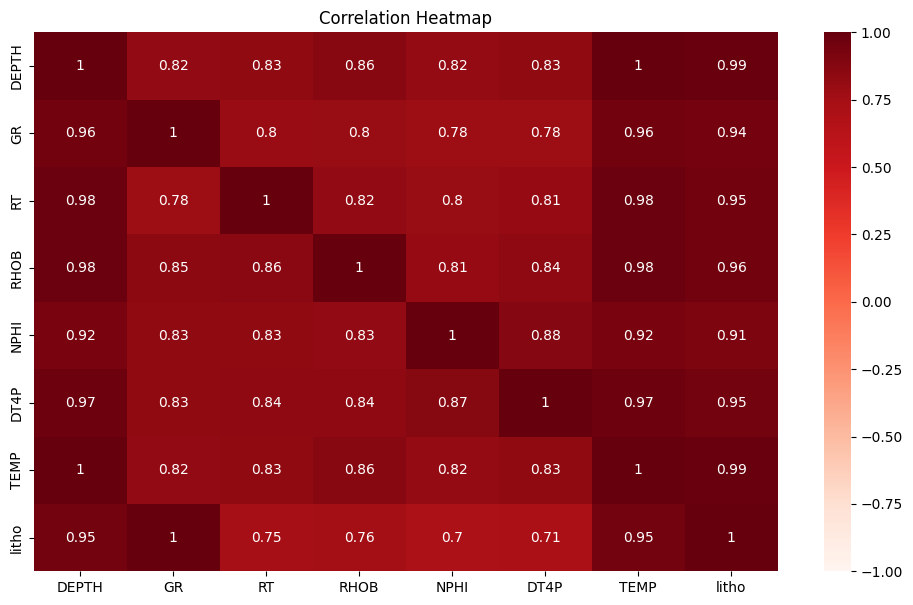

In [17]:
#Plots the heat map of Correlation Matrix
corr = Correlation(well2)
v = corr.corr(method='chatterjee')
corr.plot_heatmap(cmap='Reds')

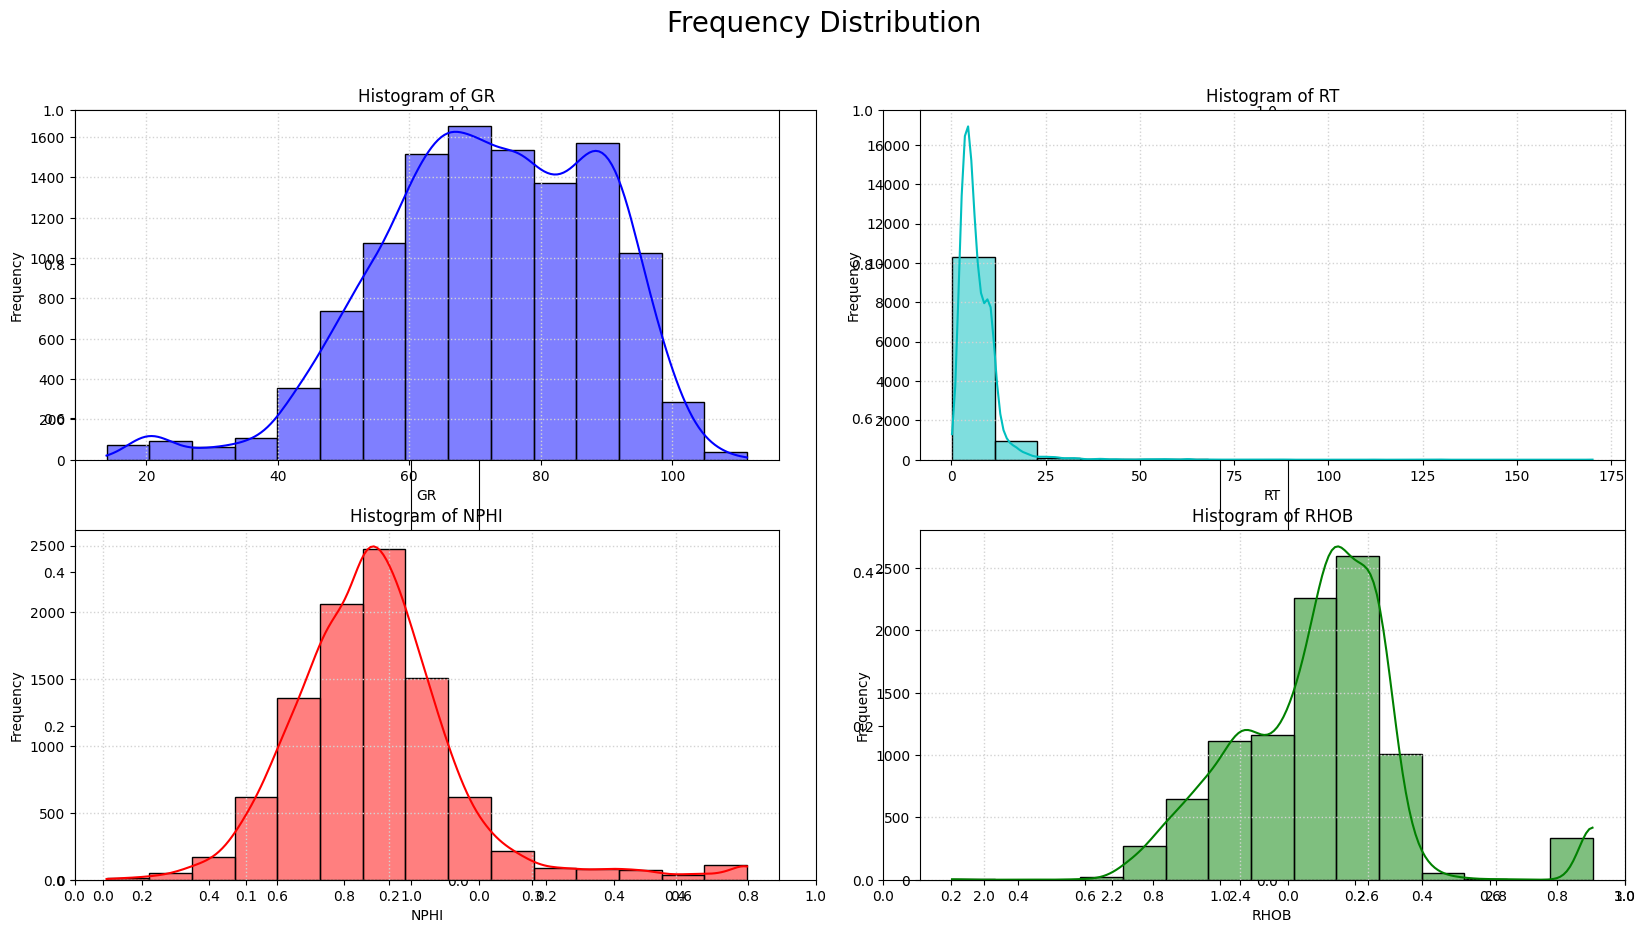

In [18]:
from petrolib.stats import displayFreq
displayFreq(well2, 'GR', 'RT', 'NPHI', 'RHOB', bins=15, figsize=(20,10))

## Workflow
Class to petrophysics workflow to evaluate any number of reservoirs of interest. Computes IGR/VSH, Total and Effective Porosities, Water and Hydrocarbon Saturation, Permeability

In [19]:
well2

,DEPTH,GR,RT,RHOB,NPHI,DT4P,TEMP,litho
0,120.0000,NaN,NaN,NaN,NaN,NaN,9.7320,Shale
1,120.1524,NaN,NaN,NaN,NaN,NaN,9.7375,Shale
2,120.3048,NaN,NaN,NaN,NaN,NaN,9.7431,Shale
3,120.4572,NaN,NaN,NaN,NaN,NaN,9.7486,Shale
4,120.6096,NaN,NaN,NaN,NaN,NaN,9.7542,Shale
...,...,...,...,...,...,...,...,...
20862,3299.3688,NaN,NaN,NaN,NaN,NaN,125.4610,Shale
20863,3299.5212,NaN,NaN,NaN,NaN,NaN,125.4666,Shale
20864,3299.6736,NaN,NaN,NaN,NaN,NaN,125.4721,Shale
20865,3299.8260,NaN,NaN,NaN,NaN,NaN,125.4777,Shale


In [20]:
from petrolib.plots import Zonation
#contact_path = Path(r"C:\Users\USER\Desktop\REX LOGS\REX-02 Top.csv")
#zones = Zonation(well_data, path=contact_path)
zones = Zonation(well2, zones = [{'RES_A':[2622, 2653]}])

In [21]:
#get reservoir information by calling the Zonation object
#ztop = top ; zbot = base; zn = zonename ; fm = formation mids to place zone name in plot
ztop, zbot, zn, fm = zones()

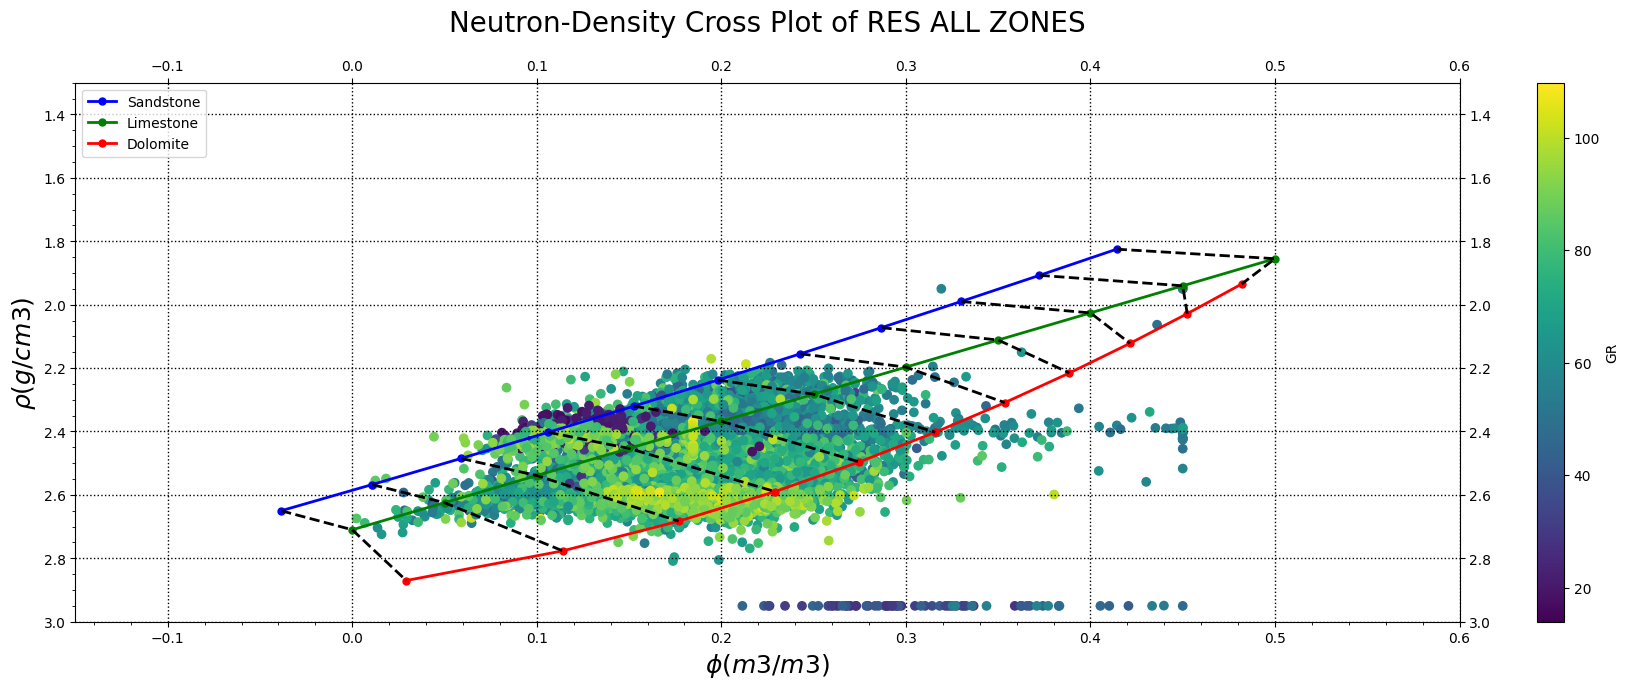

In [22]:
from petrolib.interp import crossPlot
crossPlot(well2, column_x='NPHI', column_y='RHOB', res_name='ALL ZONES', color_code='num', hue='GR')

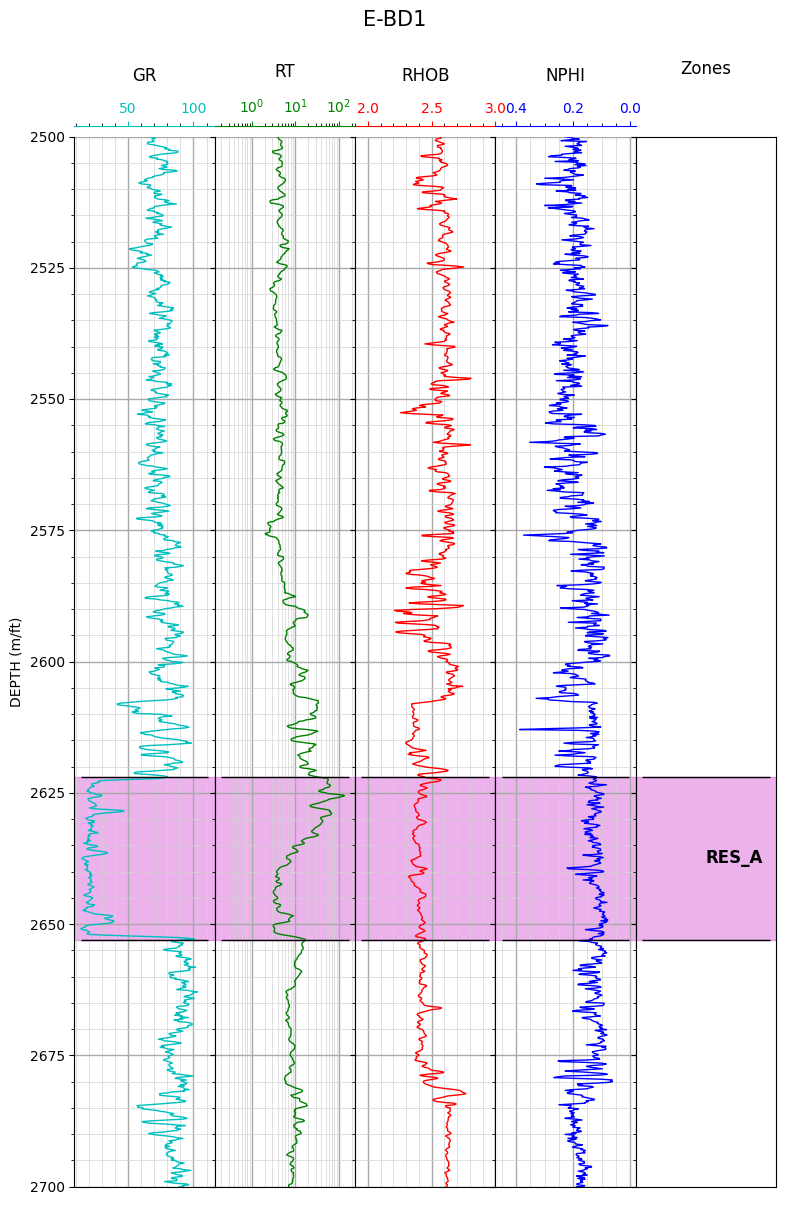

In [23]:
zones.plotZone('DEPTH', ['GR', 'RT', 'RHOB', 'NPHI'], 2500, 2700, 'E-BD1')

In [24]:
#creating quanti class
pp = Quanti(well2, zn, ztop, zbot, fm, 'DEPTH', 'GR', 'RT', 'NPHI', 'RHOB', use_mean=True)

## Volume of Shale
Computes the Volume of Shale

Parameters : method (str default 'linear') – Volume of Shale method. {‘linear’, ‘clavier’, ‘larionov_ter’, ‘larionov_older’, ‘stieber_1’, ‘stieber_2, ‘stieber_m_pliocene’} * Linear = Gamma Ray Index (IGR) * Larionov Tertiary * Larionov Older Rocks * Stieber (Miocene/Pliocene)

show_plot (bool default False) – Display plot if True.. Plots GR, VSH and Zone track

palette_op (str default None) – Palette option for to color code vshale plot. Check https://matplotlib.org/stable/tutorials/colors/colormaps.html

figsize (tuple default None) – Size of plot

Return type : Either/Both Dataframe containing the VSH and the plot if show_plot=True

In [25]:
# display data only
x = pp.vshale(method='clavier')
x = pd.concat(x)
print(x)

# display plot only
#pp.vshale(method='clavier', show_plot=True, palette_op='cubehelix', figsize=(9,12))

           DEPTH        GR       RT    RHOB    NPHI     DT4P      TEMP  \
16418  2622.1032   77.9375  39.4738  2.4519  0.1162  69.1127  100.8086   
16419  2622.2556   76.3750  53.0543  2.5039  0.1199  67.3553  100.8141   
16420  2622.4080   59.0000  57.2517  2.5528  0.1291  67.0843  100.8196   
16421  2622.5604   41.3125  57.8666  2.5738  0.1218  69.4425  100.8252   
16422  2622.7128   28.5625  56.3494  2.5643  0.1178  67.3551  100.8307   
...          ...       ...      ...     ...     ...      ...       ...   
16616  2652.2784   50.6562   7.9230  2.3724  0.1039  71.1784  101.9069   
16617  2652.4308   71.6250   9.7325  2.3817  0.1239  70.9512  101.9125   
16618  2652.5832   88.5625  12.0592  2.4158  0.1308  72.2542  101.9180   
16619  2652.7356   96.8750  14.0778  2.4446  0.1331  73.6928  101.9236   
16620  2652.8880  100.7500  16.8404  2.4547  0.1417  74.0252  101.9291   

           litho    VShale  
16418      Shale  0.553440  
16419      Shale  0.531230  
16420  Sandstone  0.3237

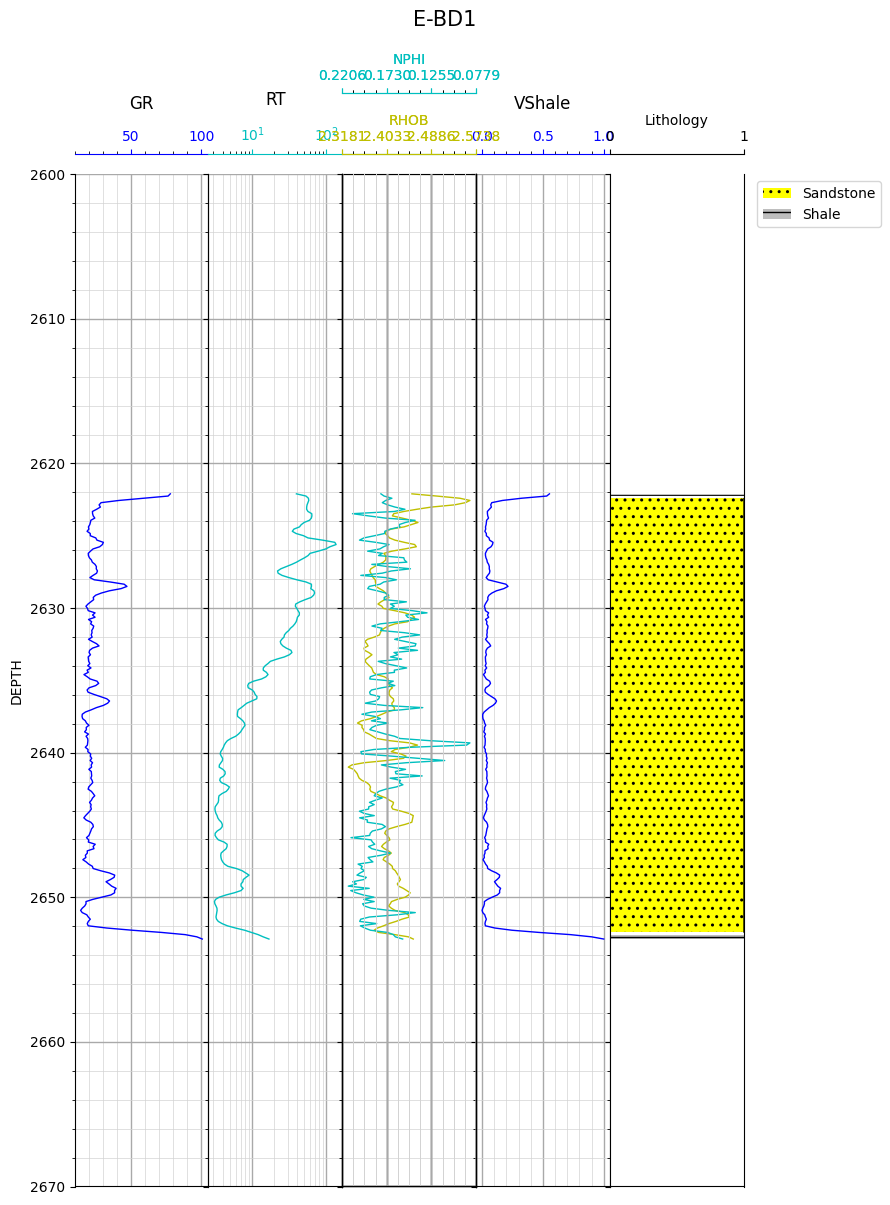

In [26]:
plotLogFacies(x, 'DEPTH', ['GR', 'RT', ['RHOB', 'NPHI'], 'VShale'], facies='litho', top=2600,
                        bottom=2670, figsize=(9, 12), title='E-BD1')

## Porosity (PHIT & PHIE)
Computes the effective and total porosities using the ‘density’ and Wyllie’s ‘sonic’ method. To use, must have called the vshale method

Parameters : method (str default 'density') – Porosity method. {‘density’, ‘sonic’}

rhob_shale (float default 2.4) – Shale matrix

rhob_fluid (float default 1.0) – Fluid density

rhob_matrix (float default 2.65) – Matrix density

fzs (float default None) – Flushed zone saturation for PHIE. If None, it is calculated from rhob_fluid, rhob_shale and rhob_matrix

show_plot (bool default False) – Display plot if True.. Plots RHOB, VSH, PHIE/PHIT and Zone track

figsize (tuple default None) – Size of plot

Return type : Either/Both Dataframe containing the PHIE/PHIT and the plot if show_plot=True

In [27]:
# display data only
y = pp.porosity(method='density')
x = pd.concat(y)
print(x)

# display plot only
#pp.porosity(method='density', show_plot=True, figsize=(10, 12))

           DEPTH        GR       RT    RHOB    NPHI     DT4P      TEMP  \
16418  2622.1032   77.9375  39.4738  2.4519  0.1162  69.1127  100.8086   
16419  2622.2556   76.3750  53.0543  2.5039  0.1199  67.3553  100.8141   
16420  2622.4080   59.0000  57.2517  2.5528  0.1291  67.0843  100.8196   
16421  2622.5604   41.3125  57.8666  2.5738  0.1218  69.4425  100.8252   
16422  2622.7128   28.5625  56.3494  2.5643  0.1178  67.3551  100.8307   
...          ...       ...      ...     ...     ...      ...       ...   
16616  2652.2784   50.6562   7.9230  2.3724  0.1039  71.1784  101.9069   
16617  2652.4308   71.6250   9.7325  2.3817  0.1239  70.9512  101.9125   
16618  2652.5832   88.5625  12.0592  2.4158  0.1308  72.2542  101.9180   
16619  2652.7356   96.8750  14.0778  2.4446  0.1331  73.6928  101.9236   
16620  2652.8880  100.7500  16.8404  2.4547  0.1417  74.0252  101.9291   

           litho    VShale      PHIT      PHIE  
16418      Shale  0.553440  0.120061  0.036206  
16419      Sh

## Water Saturation/ Hydrocarbon saturation
Computes water and hydrocarbon saturation To use, must have called both vshale and porosity methods

Parameters : method (str default 'archie') – Water Saturation method. {‘archie’, ‘simmandoux’}

rw (float default 0.03) – Formation water resisitivity

a (float default, 1.) – Turtuosity factor

m (float default 2.) – Cementation factor

n (float default 2.) – Saturation exponent

show_plot (bool default False) – Display plot if True.. Plots RT, SW, PHIE/PHIT and Zone track

figsize (tuple default None) – Size of plot

Return type : Either/Both Dataframe containing the SW, SH and the plot if show_plot=True

In [28]:
# display data only
z = pp.water_saturation(method='archie')
x = pd.concat(z)
print(x)

# display plot only
#pp.water_saturation(method='archie', show_plot=True, figsize=(10, 12))

           DEPTH        GR       RT    RHOB    NPHI     DT4P      TEMP  \
16418  2622.1032   77.9375  39.4738  2.4519  0.1162  69.1127  100.8086   
16419  2622.2556   76.3750  53.0543  2.5039  0.1199  67.3553  100.8141   
16420  2622.4080   59.0000  57.2517  2.5528  0.1291  67.0843  100.8196   
16421  2622.5604   41.3125  57.8666  2.5738  0.1218  69.4425  100.8252   
16422  2622.7128   28.5625  56.3494  2.5643  0.1178  67.3551  100.8307   
...          ...       ...      ...     ...     ...      ...       ...   
16616  2652.2784   50.6562   7.9230  2.3724  0.1039  71.1784  101.9069   
16617  2652.4308   71.6250   9.7325  2.3817  0.1239  70.9512  101.9125   
16618  2652.5832   88.5625  12.0592  2.4158  0.1308  72.2542  101.9180   
16619  2652.7356   96.8750  14.0778  2.4446  0.1331  73.6928  101.9236   
16620  2652.8880  100.7500  16.8404  2.4547  0.1417  74.0252  101.9291   

           litho    VShale      PHIT      PHIE        SW        SH  
16418      Shale  0.553440  0.120061  0.03

## Permeability
Computes the permeability. To use, must have called vshale and porosity and water_saturation methods

Parameters : show_plot (bool default False) – Display plot if True.. Plots PHIE, Permeability and Zone track

figsize (tuple default None) – Size of plot

Return type : Either/Both Dataframe containing the Perm and the plot if show_plot=True

In [29]:
# display data only
x = pp.vshale(method='clavier')
y = pp.porosity(method='density')
z = pp.water_saturation(method='archie')
a = pp.permeability()
x = pd.concat(a)
print(x)

# display plot only
#pp.vshale(method='clavier')
#pp.porosity(method='density')
#pp.water_saturation(method='archie')
#pp.permeability(show_plot=True, figsize=(9, 10))

           DEPTH        GR       RT    RHOB    NPHI     DT4P      TEMP  \
16418  2622.1032   77.9375  39.4738  2.4519  0.1162  69.1127  100.8086   
16419  2622.2556   76.3750  53.0543  2.5039  0.1199  67.3553  100.8141   
16420  2622.4080   59.0000  57.2517  2.5528  0.1291  67.0843  100.8196   
16421  2622.5604   41.3125  57.8666  2.5738  0.1218  69.4425  100.8252   
16422  2622.7128   28.5625  56.3494  2.5643  0.1178  67.3551  100.8307   
...          ...       ...      ...     ...     ...      ...       ...   
16616  2652.2784   50.6562   7.9230  2.3724  0.1039  71.1784  101.9069   
16617  2652.4308   71.6250   9.7325  2.3817  0.1239  70.9512  101.9125   
16618  2652.5832   88.5625  12.0592  2.4158  0.1308  72.2542  101.9180   
16619  2652.7356   96.8750  14.0778  2.4446  0.1331  73.6928  101.9236   
16620  2652.8880  100.7500  16.8404  2.4547  0.1417  74.0252  101.9291   

           litho    VShale      PHIT      PHIE        SW        SH        Perm  
16418      Shale  0.553440  0.

x.to_csv('E-BD1_Result.csv', index=False)

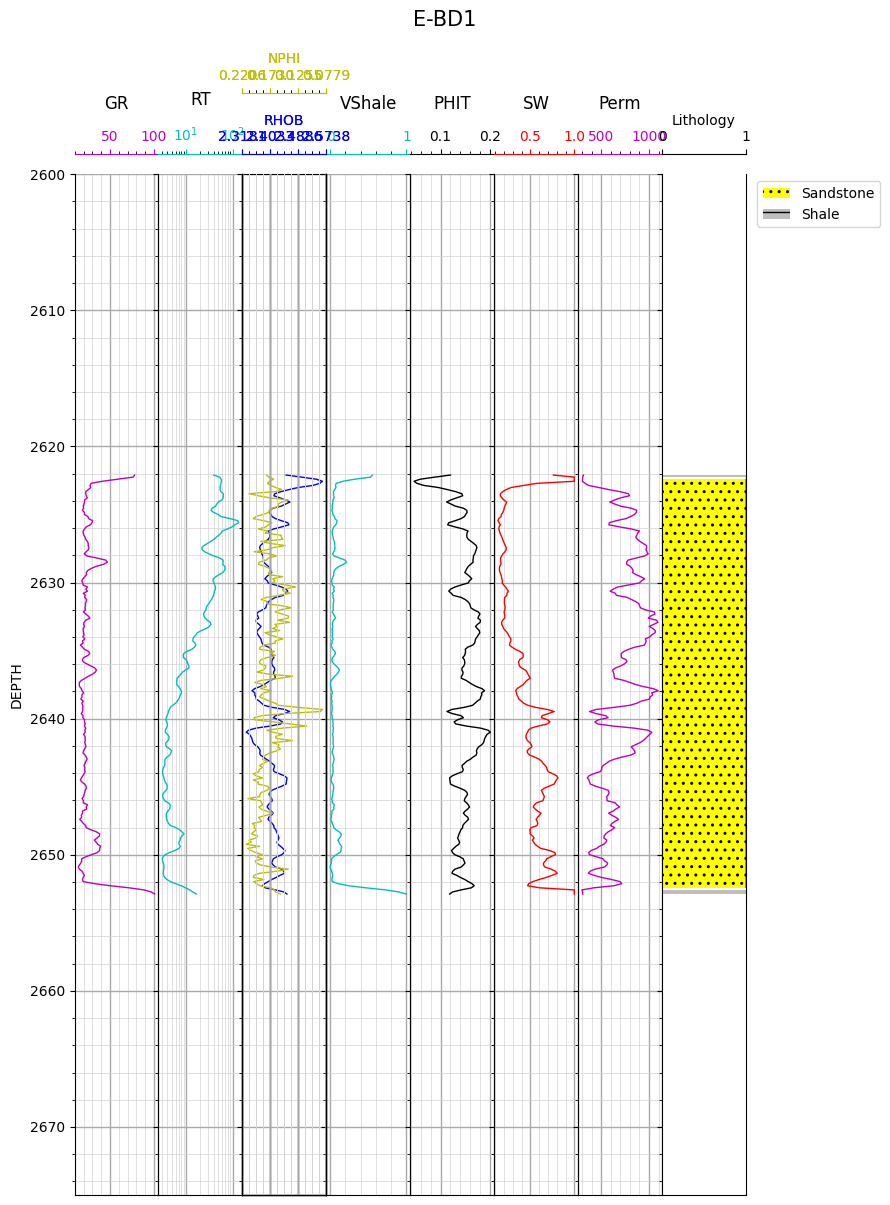

In [30]:
plotLogFacies(x, 'DEPTH', ['GR', 'RT', ['RHOB', 'NPHI'], 'VShale', 'PHIT', 'SW', 'Perm'], facies='litho', top=2600,
                        bottom=2675, figsize=(9, 12), title='E-BD1')

## Flags
Create the {ROCK, RES, PAY} flags

To use, must have called vshale, porosity, water_saturation and permeability methods

Parameters : vsh_method (float) – Volume of Shale cutoff. Applied only to [‘ROCK’] flag

por_cutoff (float) – Porosity cutoff. Applied only to the [‘ROCK’, ‘RES’] flags

sw_cutoff (float) – Water Saturation cutoff. Applied only to the [‘ROCK’, ‘RES’, ‘PAY] flags

ref_unit (str default 'm') – Reference unit for measured depth. Defaults to metres

show_plot (bool default False) – Display plot if True.. Plots GR, RT, VSH, SW, Perm, NPHI/RHOB, PHIE/PHIT, [‘ROCK’, ‘RES’, ‘PAY] flags and Zonation track

palette_op (str default None) – palette option for VSH coloring. Check https://matplotlib.org/stable/tutorials/colors/colormaps.html for availabel palette options

figsize (tuple default None) – Size of plot

Return type : Either/Both Dataframe containing the flags and the plot if show_plot=True

In [31]:
# Display data only
y = pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8)
x = pd.concat(y)
print(x)

# Display plot only
#pp.flags(por_cutoff=.12, vsh_cutoff=.5, sw_cutoff=0.8, show_plot=True, palette_op='cubehelix', figsize=(20, 15))

           DEPTH        GR       RT    RHOB    NPHI     DT4P      TEMP  \
16418  2622.1032   77.9375  39.4738  2.4519  0.1162  69.1127  100.8086   
16419  2622.2556   76.3750  53.0543  2.5039  0.1199  67.3553  100.8141   
16420  2622.4080   59.0000  57.2517  2.5528  0.1291  67.0843  100.8196   
16421  2622.5604   41.3125  57.8666  2.5738  0.1218  69.4425  100.8252   
16422  2622.7128   28.5625  56.3494  2.5643  0.1178  67.3551  100.8307   
...          ...       ...      ...     ...     ...      ...       ...   
16616  2652.2784   50.6562   7.9230  2.3724  0.1039  71.1784  101.9069   
16617  2652.4308   71.6250   9.7325  2.3817  0.1239  70.9512  101.9125   
16618  2652.5832   88.5625  12.0592  2.4158  0.1308  72.2542  101.9180   
16619  2652.7356   96.8750  14.0778  2.4446  0.1331  73.6928  101.9236   
16620  2652.8880  100.7500  16.8404  2.4547  0.1417  74.0252  101.9291   

           litho    VShale      PHIT      PHIE        SW        SH  \
16418      Shale  0.553440  0.120061  0.0

## Pay Summary
Computes the net, grossand not net thicknesses

net-to-gross

average volume of shale

average porosity value

bulk volume of water

water saturation

for each of the three flags {ROCK, RES, PAY}

Parameters : name (str) – Name of the well

Return type : Displays the Pay Summary Report table

Example

In [32]:
pp.paySummary(name='E-BD1')

,Well,Zones,Flag Name,Top,Bottom,Unit,Gross,Net,Not Net,NTG,BVW,Average VShale,Average Porosity,Average Water Saturation
0,E-BD1,RES_A,ROCK,2622.103200,2652.888000,m,30.784800,27.600166,3.184634,0.896552,0.058890,0.040667,0.145262,0.412303
1,E-BD1,RES_A,RES,2622.103200,2652.888000,m,30.784800,27.600166,3.184634,0.896552,0.058890,0.040667,0.145262,0.412303
2,E-BD1,RES_A,PAY,2622.103200,2652.888000,m,30.784800,29.874904,0.909896,0.970443,0.058272,0.053206,0.142800,0.417959
